Open Food Facts est une base de données collaborative en ligne sur les produits alimentaires du monde entier. Elle est créée et maintenue par une communauté de bénévoles et d'organisations à but non lucratif. Les utilisateurs peuvent rechercher des informations sur les produits alimentaires, notamment les ingrédients, les informations nutritionnelles et les labels de qualité.  Cependant il est à noté que les informations fournies par les utilisateurs, peuvent etre soient inexactes ou incomplètes.


In [2]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sn

In [5]:
from fonctions import func

Exploration du dataset

In [6]:
filepath=r"\Users\pandiaye\OneDrive - KEDGE Business School\Documents\Final_Datascience\en.openfoodfacts.org.products.csv.zip"

In [7]:
# read the dataset using the compression zip
df = pd.read_csv(filepath,compression="zip",delimiter= '\t')

C:\Users\pandiaye\AppData\Local\Temp\ipykernel_3664\831704157.py:2: DtypeWarning: Columns (0,9,15,24,25,29,30,31,33,51,65,70,87,148) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath,compression="zip",delimiter= '\t')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841812 entries, 0 to 2841811
Columns: 201 entries, code to carnitine_100g
dtypes: float64(125), int64(2), object(74)
memory usage: 4.3+ GB
None


In [26]:
#Affichage d'un échantillon du dataset
df.sample(6)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
1593428,4009337300322,http://world-en.openfoodfacts.org/product/4009...,kiliweb,1622888553,2021-06-05T10:22:33Z,1649779868,2022-04-12T16:11:08Z,charlesnepote,Bergische Rinderbratwurst,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464141,8410282205802,http://world-en.openfoodfacts.org/product/8410...,kiliweb,1573300800,2019-11-09T12:00:00Z,1608117567,2020-12-16T11:19:27Z,elcoco,Petras,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1736519,4260606740168,http://world-en.openfoodfacts.org/product/4260...,prepperapp,1680596156,2023-04-04T08:15:56Z,1680596833,2023-04-04T08:27:13Z,roboto-app,Spessart Leberwurst,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586031,713733674539,http://world-en.openfoodfacts.org/product/0713...,org-database-usda,1587659395,2020-04-23T16:29:55Z,1587659396,2020-04-23T16:29:56Z,org-database-usda,Soda,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162031,41498121570,http://world-en.openfoodfacts.org/product/0041...,waistline-app,1546905836,2019-01-08T00:03:56Z,1562843130,2019-07-11T11:05:30Z,clockwerx,Shredded Mexican style cheese,NaN,...,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84605,30034075064,http://world-en.openfoodfacts.org/product/0030...,usda-ndb-import,1489078407,2017-03-09T16:53:27Z,1587589832,2020-04-22T21:10:32Z,org-database-usda,"Giant eagle, crumbled goat cheese",NaN,...,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:

print ("Le dataset compte {} lignes et {} variables".format(df.shape[0], df.shape[1]))

Le dataset compte 2841812 lignes et 201 variables


Nettoyage des données


In [ ]:
#Detection des colonnes entienerement vides

features,empty_c= func.selected_features(filepath,80,200000)

In [7]:
len(empty_c)

134

In [8]:
print(empty_c)

['abbreviated_product_name', 'generic_name', 'packaging', 'packaging_tags', 'packaging_en', 'packaging_text', 'origins', 'origins_tags', 'origins_en', 'manufacturing_places', 'manufacturing_places_tags', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'allergens', 'allergens_en', 'traces', 'traces_tags', 'traces_en', 'no_nutrition_data', 'additives', 'additives_tags', 'additives_en', 'brand_owner', 'owner', 'data_quality_errors_tags', 'energy-kj_100g', 'energy-from-fat_100g', 'butyric-acid_100g', 'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g', 'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g', 'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'unsaturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_

201 features sur 134 ont un taux de valeurs nulles supérieur à 80%, ce qui représente une très grosse part de données manquantes. La majeure partie de ces variables ne peuvent pas être recalculées puisqu'il s'agit de mesures physico-chimiques directes sur les produits. On decide donc de les supprimer.

In [9]:
#colonnes selectionnées
df=df.drop(empty_c,axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841812 entries, 0 to 2841811
Data columns (total 67 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   code                                                   object 
 1   url                                                    object 
 2   creator                                                object 
 3   created_t                                              int64  
 4   created_datetime                                       object 
 5   last_modified_t                                        int64  
 6   last_modified_datetime                                 object 
 7   last_modified_by                                       object 
 8   product_name                                           object 
 9   quantity                                               object 
 10  brands                                                 object 
 11

La base de données d'Open Food Facts contient plusieurs informations sur les produits alimentaires, notamment :

-La liste des ingrédients : Open Food Facts répertorie tous les ingrédients présents dans un produit alimentaire et indique leur origine (végétale, animale ou synthétique).

-Les informations nutritionnelles : Les informations sur les calories, les graisses, les glucides, les protéines, les vitamines et les minéraux sont fournies pour chaque produit alimentaire.

-Les labels de qualité : La base de données indique les labels de qualité, tels que le label bio, le label équitable, le label sans OGM, etc.

-Les additifs : Open Food Facts répertorie les additifs alimentaires présents dans chaque produit alimentaire et fournit des informations sur leur sécurité, leur origine et leur rôle dans le produit.

-Les allergènes : La base de données indique les allergènes présents dans chaque produit alimentaire.

-Les marques et les producteurs : Les marques et les producteurs sont répertoriés pour chaque produit alimentaire.

-Les codes-barres : Open Food Facts utilise les codes-barres pour identifier les produits alimentaires et faciliter la recherche d'informations sur ces derniers.

En s'appuyant sur la liste ci dessus , nous avons opté pour le clustering sur les informations nutritionnelles qui nous semble le plus pertinent vu le nombre de colonne concernées.  
Cette classification regrouperait les produits alimentaires en fonction de leur profil nutritionnel global. Cela pourrait aider les consommateurs à comparer facilement les produits en termes de qualité nutritionnelle globale, plutôt qu'en se concentrant sur des nutriments individuels.

 Pour la suite des analyses, nous allons nous concentrer sur les nutriments des produits. Ces données sont suffixées avec _100g. Nous allons donc conserver les lignes pour lesquelles au moins une de ces features est complétée :

In [10]:
# Suppression des doublons en fonction du code
df.drop_duplicates(subset ="code", keep = 'last', inplace=True)

In [11]:
#Nous allons supprimer tous les produits qui n'ont pas de nom qui ne pourront donc être clairement identifiés.
df = df[~(df.product_name.isnull())]

In [12]:
#Detection des produits identiques
df[(df["product_name"].isnull()==False) 
      & (df["brands"].isnull()==False)].groupby(by=["product_name","brands"])["code"].nunique().sort_values(ascending=False)

product_name                       brands                 
Burger vegetariana                 Bonarea                    318
Filet de poulet                    La Nouvelle Agriculture    233
Burger vegana                      Bonarea                    214
Filet de poulet                    Le Gaulois                 210
Finísimo de pechuga de pavo        Bonarea                    159
                                                             ... 
Garbanzos deescacena               El Corte Inglés              1
Garbanzos de Castilla con acelgas  Deluxe                       1
Garbanzos congelados               carrefour                    1
                                   Hacendado                    1
🤬                                  🤬                            1
Name: code, Length: 1274485, dtype: int64

In [13]:
# Suppression des doublons sur marque et produit en conservant les valeurs nulles
df = df[(~df.duplicated(["product_name","brands"],keep="last")) 
      | ((df['product_name'].isnull()) & (df['brands'].isnull()))]

In [14]:
#detection des colonnes nutriments
df_subset_nutients = func.search_componant(df,'_100g')
df_subset_nutients.head()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,165.0,690.0,2.0,2.00,65.0,12.60,3.0,1.5,NaN,NaN,NaN,NaN
4,375.0,1569.0,7.0,3.08,70.1,15.00,NaN,7.8,1.4,0.56,NaN,NaN
7,194.0,812.0,11.0,3.90,5.7,0.05,NaN,18.0,NaN,NaN,NaN,NaN
8,874.9,3661.0,15.1,6.10,2.6,1.00,NaN,15.7,2.1,0.84,NaN,NaN


In [16]:
print('Lignes nutriments (_100g) vides: {}'.format(df_subset_nutients.isnull().all(axis=1).sum()))

Lignes nutriments (_100g) vides: 295539


In [15]:
# Suppression des lignes nutriments vides
df_nutri= df[df_subset_nutients.notnull().any(axis=1)]
df_nutri.shape

(1852003, 67)

In [16]:
df_nutri=df_nutri[df_subset_nutients.columns]

In [20]:
df_nutri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852003 entries, 1 to 2841811
Data columns (total 12 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   energy-kcal_100g                                       float64
 1   energy_100g                                            object 
 2   fat_100g                                               float64
 3   saturated-fat_100g                                     float64
 4   carbohydrates_100g                                     float64
 5   sugars_100g                                            float64
 6   fiber_100g                                             float64
 7   proteins_100g                                          float64
 8   salt_100g                                              float64
 9   sodium_100g                                            float64
 10  fruits-vegetables-nuts-estimate-from-ingredients_100g  float64
 11

In [17]:
data= df_nutri.drop(["energy-kcal_100g","energy_100g","nutrition-score-fr_100g"],axis=1)

In [18]:
#On supprime les lignes contenant des valeurs négatives et des max aberrants
data = data[~(data[data.columns] < 0).any(axis=1)]

In [19]:
data = data[~(data[data.columns] > 100).any(axis=1)]

In [20]:
data=data.fillna(0)

In [21]:
data["somme_100g"] = data.sum(axis=1)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848581 entries, 1 to 2841811
Data columns (total 10 columns):
 #   Column                                                 Dtype  
---  ------                                                 -----  
 0   fat_100g                                               float64
 1   saturated-fat_100g                                     float64
 2   carbohydrates_100g                                     float64
 3   sugars_100g                                            float64
 4   fiber_100g                                             float64
 5   proteins_100g                                          float64
 6   salt_100g                                              float64
 7   sodium_100g                                            float64
 8   fruits-vegetables-nuts-estimate-from-ingredients_100g  float64
 9   somme_100g                                             float64
dtypes: float64(10)
memory usage: 155.1 MB


<Axes: xlabel='somme_100g', ylabel='Count'>

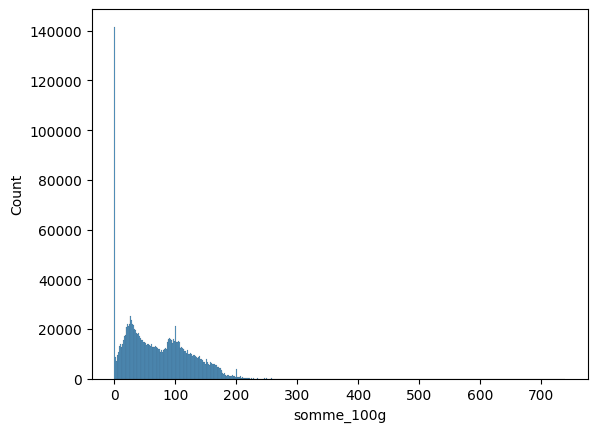

In [33]:
sn.histplot(data=data, x="somme_100g")

In [28]:
data.sample(5)

,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,somme_100g
2836254,1.200000,1.200000,75.000000,0.0,0.0,11.000000,0.010000,0.004000,0.0,88.414000
194917,0.000000,0.000000,12.920000,12.5,0.0,0.000000,0.010000,0.004000,0.0,25.434000
1622584,25.800000,17.400000,25.600000,0.6,0.0,25.600000,0.600000,0.240000,0.0,95.840000
659439,11.666667,5.833333,41.666667,10.0,25.0,33.333333,0.833333,0.333333,0.0,128.666667
1764992,6.100000,3.900000,79.300000,67.5,0.0,3.200000,0.120000,0.048000,0.0,160.168000


In [22]:
de = data[(data["somme_100g"] > 80)]

In [23]:
de= de[(de["somme_100g"] < 120 )]

In [51]:
de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 424238 entries, 1 to 2841811
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   fat_100g                                               424238 non-null  float64
 1   saturated-fat_100g                                     424238 non-null  float64
 2   carbohydrates_100g                                     424238 non-null  float64
 3   sugars_100g                                            424238 non-null  float64
 4   fiber_100g                                             424238 non-null  float64
 5   proteins_100g                                          424238 non-null  float64
 6   salt_100g                                              424238 non-null  float64
 7   sodium_100g                                            424238 non-null  float64
 8   fruits-vegetables-nuts-estimate-f

<Axes: xlabel='somme_100g', ylabel='Count'>

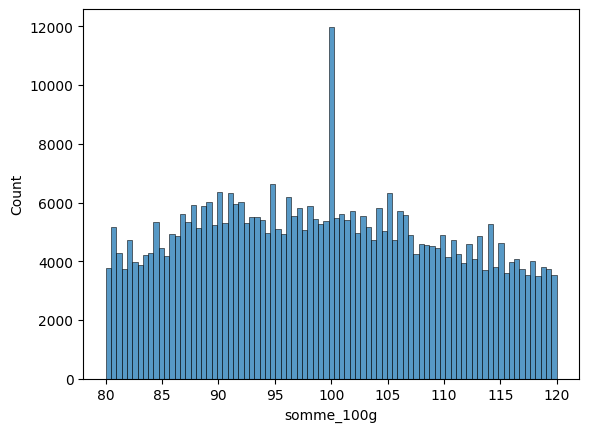

In [52]:
sn.histplot(data=de, x="somme_100g")

In [ ]:
de=de.drop("somme_100g",axis=1)

In [27]:
np.save("data_cleaned_1.npy",de)

In [ ]:
# Suppression des lignes nutriments vides
df_nutri2= df[df_subset_nutients.notnull().any(axis=1)]
df_nutri2.shape

In [ ]:
chosen=df_subset_nutients.columns+ ["pnns_groups_2"]

In [ ]:
df_nutri2=df_nutri2[chosen]

In [ ]:
df_nutri2= df_nutri2.drop(["energy-kcal_100g","energy_100g","nutrition-score-fr_100g"],axis=1)

In [ ]:
#On supprime les lignes contenant des valeurs négatives et des max aberrants
df_nutri2 = df_nutri2[~(df_nutri2[data.columns] < 0).any(axis=1)]
df_nutri2 = df_nutri2[~(df_nutri2[data.columns] > 100).any(axis=1)]

In [ ]:
# On complète les variables restantes avec la médiane du groupe pnns 2
for col in data.columns:
    df_nutri2[col] = df_nutri2.groupby('pnns_groups_2')[col].transform(lambda x: x.fillna(x.median()))

In [ ]:
df_nutri2bis=df_nutri2.drop("pnns_groups_2",axis=1)

In [ ]:
df_nutri2bis["somme_100g"] = df_nutri2bis.sum(axis=1)

In [ ]:
df_nutri2bis = df_nutri2bis[(df_nutri2bis["somme_100g"] > 90)]
df_nutri2bis = df_nutri2bis[(df_nutri2bis["somme_100g"] < 105)]

In [ ]:
sn.histplot(data=df_nutri2bis, x="somme_100g")

In [ ]:
df_nutri2bis=df_nutri2bis.drop("somme_100g",axis=1)

In [ ]:
np.save("data_cleaned_2.npy",df_nutri2bis)

   #Clustering

In [10]:
from sklearn.cluster import Birch,AgglomerativeClustering
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import silhouette_score,make_scorer,calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
X=np.load(r'C:\Users\pandiaye\OneDrive - KEDGE Business School\Documents\Clustering\data_cleaned_1.npy')

In [ ]:
# Normaliser les données
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Créer un objet Birch avec HalvingSearch
birch = Birch(n_clusters=None, threshold=0.5, branching_factor=50)
birch.fit(X)

In [12]:
# Get labels and number of clusters from BIRCH
labels = birch.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found by BIRCH: {n_clusters}")

Number of clusters found by BIRCH: 258540


In [8]:
# Calculer la silhouette
silhouette = silhouette_score(X, birch.labels_)
print("Silhouette :", silhouette)

# Calculer la cohésion et la séparation
ch_score = calinski_harabasz_score(X, birch.labels_)
print("Cohésion et séparation :", ch_score)

Silhouette : 0.3674228849722239
Cohésion et séparation : 48466.00794818267


In [ ]:
# Visualiser l'arbre de clustering
plt.figure(figsize=(10, 7))
birch.plot_tree()
plt.show()

In [14]:
# Créer un objet Birch avec HalvingSearch
birch2 = Birch(n_clusters=None, threshold=0.5, branching_factor=10)
birch2.fit(X)

Birch(branching_factor=10, n_clusters=None)

In [16]:
# Calculer la silhouette
silhouette2 = silhouette_score(X, birch2.labels_)
print("Silhouette :", silhouette2)

In [ ]:
# Create and fit Agglomerative Clustering with BIRCH output
agg = AgglomerativeClustering(n_clusters=n_clusters, linkage="ward")
agg.fit(birch.transform(X))

In [ ]:
# X est la matrice de données normalisées
# labels est une liste des étiquettes de cluster pour chaque échantillon
score = silhouette_score(X,  agg.labels_)
print("Silhouette score: ", score)


In [ ]:
# Apply PCA to reduce the dimensions of the dataset to 2
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)